<a href="https://colab.research.google.com/github/GillValenzuela/curso_data_science/blob/master/DS_Ingemat_Clase_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
wine = load_wine()
X = wine.data
y = wine.target

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [3]:
X_scaled = StandardScaler().fit_transform(X)

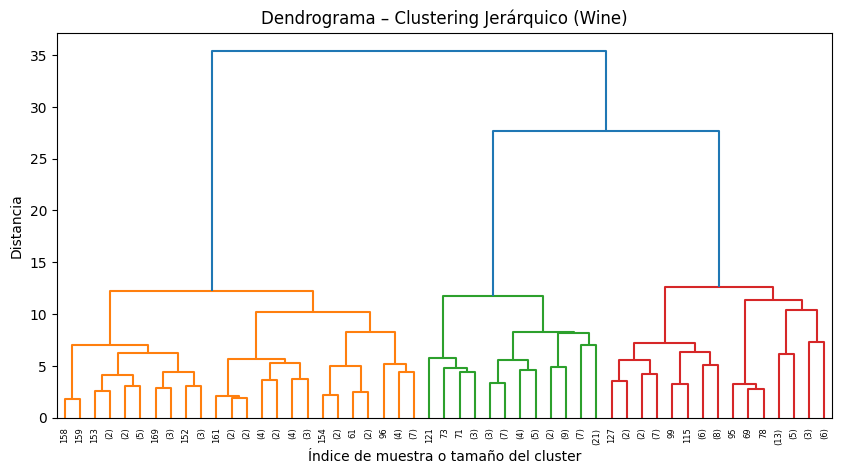

In [4]:
# Dendrograma
plt.figure(figsize=(10, 5))
plt.title("Dendrograma – Clustering Jerárquico (Wine)")
linked = linkage(X_scaled, method='ward')
dendrogram(linked, truncate_mode='level', p=5)
plt.xlabel("Índice de muestra o tamaño del cluster")
plt.ylabel("Distancia")
plt.show()

In [5]:
hierarchical_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('hierarchical', AgglomerativeClustering(n_clusters=3))
])

In [6]:
hierarchical_labels = hierarchical_pipe.fit_predict(X)

In [7]:
hierarchical_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [11]:
X_reduced = PCA(n_components=2).fit_transform(X_scaled)

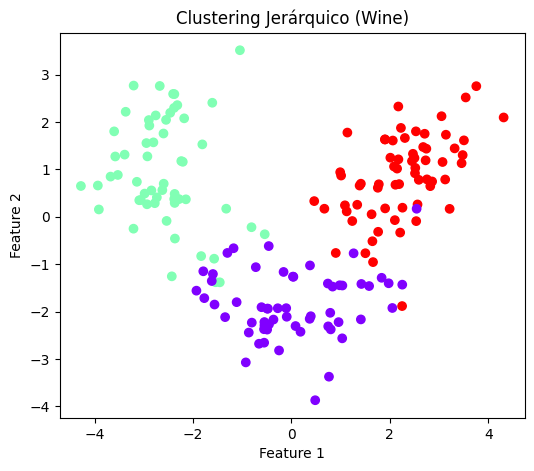

In [12]:
plt.figure(figsize=(6,5))
plt.title("Clustering Jerárquico (Wine)")
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=hierarchical_labels, cmap='rainbow')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [13]:
gmm = GaussianMixture(n_components=3,
                      covariance_type="full",
                      random_state=42)
gmm.fit(X_scaled)

GaussianMixture(n_components=3, random_state=42)

In [14]:
gmm_labels = gmm.predict(X_scaled)

In [15]:
gmm_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

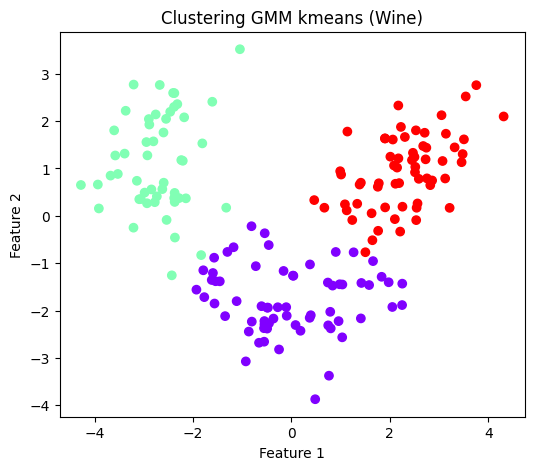

In [20]:
plt.figure(figsize=(6,5))
plt.title("Clustering GMM kmeans (Wine)")
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=gmm_labels, cmap='rainbow')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [17]:
gmm_random = GaussianMixture(n_components=3,
                      covariance_type="full",
                      random_state=42,
                      init_params='random')
gmm_random.fit(X_scaled)
gmm_random_labels = gmm_random.predict(X_scaled)

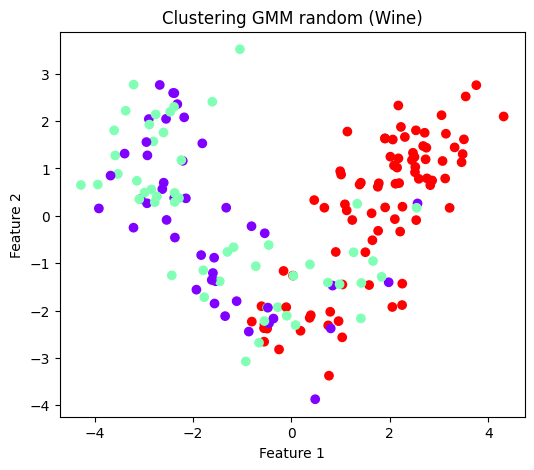

In [21]:
plt.figure(figsize=(6,5))
plt.title("Clustering GMM random (Wine)")
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=gmm_random_labels, cmap='rainbow')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import hdbscan

In [39]:
dbscan_pipe = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan_pipe.fit_predict(X_reduced)

hdbscan_pipe = hdbscan.HDBSCAN(min_cluster_size=15)
hdbscan_labels = hdbscan_pipe.fit_predict(X_reduced)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [34]:
dbscan_labels

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1])

In [35]:
hdbscan_labels

array([ 3, -1,  3, -1, -1, -1,  3,  3,  3,  3,  3,  3,  3,  3, -1,  3, -1,
        3, -1,  3,  3,  3,  3,  3,  3, -1,  3, -1,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3, -1,  3,  3, -1,  3, -1,  3, -1,  3,  3,  3,  3, -1,
        3, -1,  3,  3,  3,  3,  3,  3, -1,  5, -1, -1, -1,  4, -1, -1, -1,
       -1,  2,  5,  2, -1,  3,  2,  4,  4,  5, -1, -1, -1,  2,  4,  1, -1,
        4,  4,  4,  4,  4, -1,  5,  5,  4,  4,  3, -1, -1, -1, -1,  4,  4,
       -1,  4,  4,  5,  4,  5,  4,  2,  2,  4, -1,  4,  4, -1, -1,  4, -1,
        4, -1,  3, -1, -1, -1,  4, -1,  5,  4,  5, -1,  1,  1,  1, -1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  0,  0,  0,  0, -1,
        0,  1, -1,  0,  1, -1, -1,  1, -1,  1,  1,  0,  1,  0, -1,  0,  0,
       -1, -1,  0, -1,  0, -1,  0, -1])

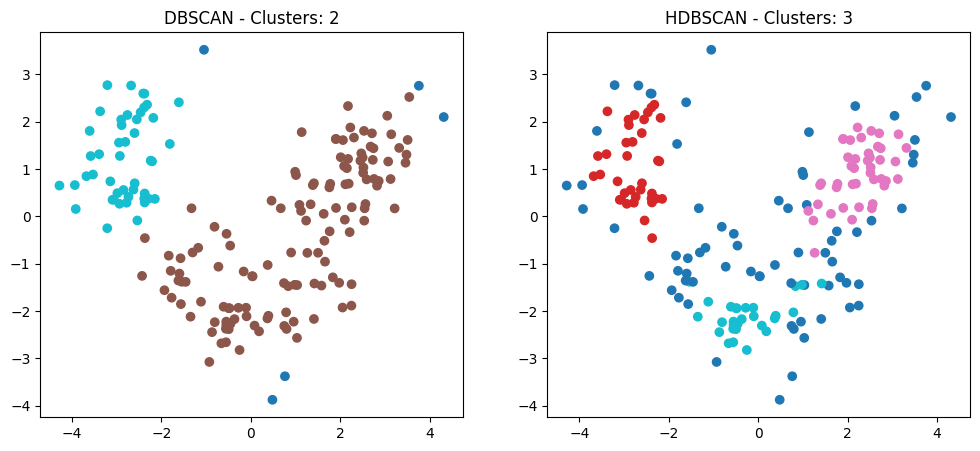

Silueta DBSCAN: 0.4783571713474489
Silueta HDBSCAN: 0.7236510872289913


In [40]:
# 5. Visualización
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X_reduced[:, 0], X_reduced[:, 1], c=dbscan_labels, cmap='tab10')
axs[0].set_title(f'DBSCAN - Clusters: {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}')

axs[1].scatter(X_reduced[:, 0], X_reduced[:, 1], c=hdbscan_labels, cmap='tab10')
axs[1].set_title(f'HDBSCAN - Clusters: {len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)}')

plt.show()

# 6. Evaluación silueta
def valid_labels(labels):
    return labels[labels != -1]

if len(set(dbscan_labels)) > 1:
    print("Silueta DBSCAN:", silhouette_score(X_reduced[dbscan_labels != -1], valid_labels(dbscan_labels)))
if len(set(hdbscan_labels)) > 1:
    print("Silueta HDBSCAN:", silhouette_score(X_reduced[hdbscan_labels != -1], valid_labels(hdbscan_labels)))

In [43]:
# Autoencoder con Keras para Reducción de Dimensionalidad (Wine Dataset)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

In [44]:
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

In [45]:
X.shape[1]

13

In [46]:
# 2. Definir arquitectura del autoencoder
input_dim = X.shape[1]
encoding_dim = 2

In [47]:
input_layer = Input(shape=(input_dim,))
encoded = Dense(8, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)

In [48]:
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

In [49]:
autoencoder = Model(inputs=input_layer, outputs=decoded)
encoder = Model(inputs=input_layer, outputs=encoded)

In [50]:
# 3. Compilar y entrenar
autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss=MeanSquaredError())
history = autoencoder.fit(X_train, X_train,
                          validation_data=(X_test, X_test),
                          epochs=100,
                          batch_size=16,
                          verbose=0)

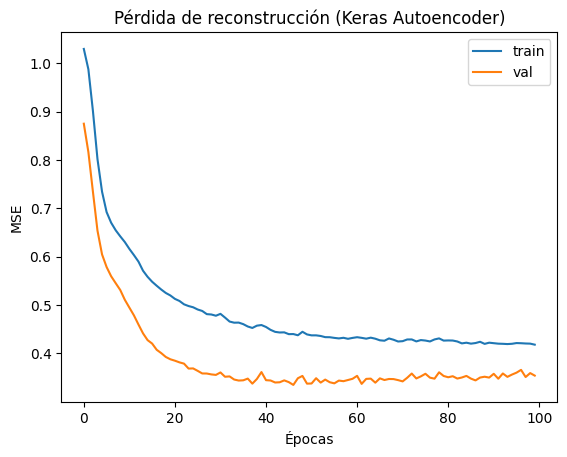

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


<ipython-input-52-6497518d9f0f>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_latent[:, 0], X_latent[:, 1], cmap='tab10')


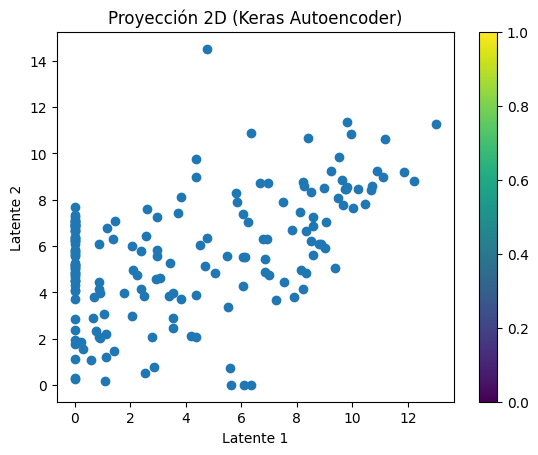

In [52]:
# 4. Visualización de la pérdida
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Pérdida de reconstrucción (Keras Autoencoder)")
plt.xlabel("Épocas")
plt.ylabel("MSE")
plt.legend()
plt.show()

# 5. Proyección en espacio latente
X_latent = encoder.predict(X_scaled)
plt.scatter(X_latent[:, 0], X_latent[:, 1], cmap='tab10')
plt.title("Proyección 2D (Keras Autoencoder)")
plt.xlabel("Latente 1")
plt.ylabel("Latente 2")
plt.colorbar()
plt.show()